In [165]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score,classification_report
from xgboost import plot_importance


In [96]:
df = pd.read_csv("/home/lslima/Área de Trabalho/Projetos/Diabetes/diabetes/diabetes_prediction_dataset.csv")
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [97]:
df.columns = ["Gênero","Idade","Hipertensão","Doenca_cardiaca","Historico_fumante","IMC","Nivel_HbA1c","nivel_glicose_sangue","diabetes"]

In [98]:
df.head()

,Gênero,Idade,Hipertensão,Doenca_cardiaca,Historico_fumante,IMC,Nivel_HbA1c,nivel_glicose_sangue,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [ ]:
df['Gênero'] = df['Gênero'].replace({
    "Female": "Feminino",
    "Male": "Masculino",
    "Other": "Outro"
})

df['Historico_fumante'] = df['Historico_fumante'].replace({
    "never": "nunca",
    "No Info": "s/ inform.",
    "current": "fumante",
    "former": "ex-fum",
    "ever": "já fumou",
    "not current": "não fuma atualmente"
})

In [100]:
df.head()

,Gênero,Idade,Hipertensão,Doenca_cardiaca,Historico_fumante,IMC,Nivel_HbA1c,nivel_glicose_sangue,diabetes
0,Feminino,80.0,0,1,nunca,25.19,6.6,140,0
1,Feminino,54.0,0,0,s/ inform.,27.32,6.6,80,0
2,Masculino,28.0,0,0,nunca,27.32,5.7,158,0
3,Feminino,36.0,0,0,fumante,23.45,5.0,155,0
4,Masculino,76.0,1,1,fumante,20.14,4.8,155,0


In [101]:
print(df["Historico_fumante"].unique())

['nunca' 's/ inform.' 'fumante' 'ex-fum' 'já fumou' 'n fuma atualmente']


In [102]:
#Primeiro, vamos verificar se existem dados duplicados
linhas_duplicadas = df[df.duplicated()]
print("Número de linhas duplicadas: ", linhas_duplicadas.shape)

Número de linhas duplicadas:  (3854, 9)


In [103]:
df = df.drop_duplicates()

In [104]:
#Segundo, vamos verificar a existência de valores ausentes
print(df.isnull().sum())

Gênero                  0
Idade                   0
Hipertensão             0
Doenca_cardiaca         0
Historico_fumante       0
IMC                     0
Nivel_HbA1c             0
nivel_glicose_sangue    0
diabetes                0
dtype: int64


In [105]:
print(len(df['Gênero'].unique()))

df = df[df['Gênero'] != 'Outro']

3


In [106]:
#Terceiro, vamos ver as descrições estatísticas
df.describe()

,Idade,Hipertensão,Doenca_cardiaca,IMC,Nivel_HbA1c,nivel_glicose_sangue,diabetes
count,96128.000000,96128.000000,96128.000000,96128.000000,96128.000000,96128.000000,96128.000000
mean,41.796617,0.077615,0.040810,27.321450,5.532633,138.218001,0.088237
std,22.463329,0.267567,0.197851,6.767811,1.073225,40.911190,0.283640
min,0.080000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.000000,0.000000,23.400000,4.800000,100.000000,0.000000
50%,43.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,59.000000,0.000000,0.000000,29.860000,6.200000,159.000000,0.000000
max,80.000000,1.000000,1.000000,95.690000,9.000000,300.000000,1.000000


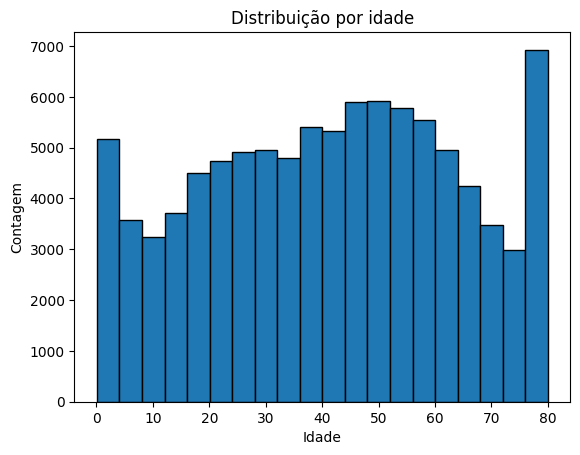

In [107]:
#Agora, vamos plotar alguns gráficos.
#O primeiro deles, é um histograma das idades.

plt.hist(df['Idade'], bins= 20, edgecolor = "black")
plt.title('Distribuição por idade')
plt.xlabel('Idade')
plt.ylabel('Contagem')
plt.show()

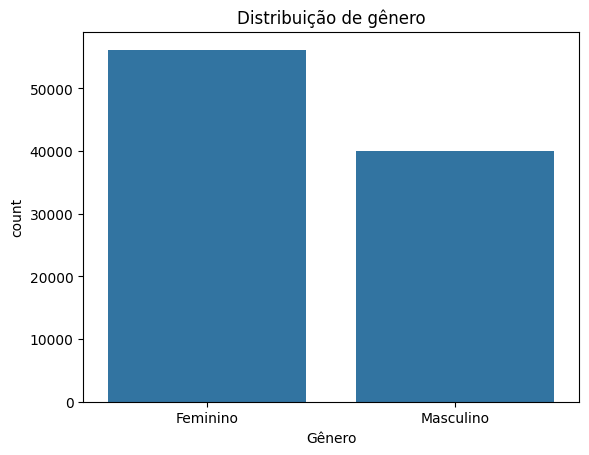

In [108]:
#Agora, faremos um gráfico de barras para ver a distribuição de gênero
sns.countplot(x='Gênero', data=df)
plt.title("Distribuição de gênero")
plt.show()

/tmp/ipykernel_55991/745743743.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['IMC'],bins= 30)


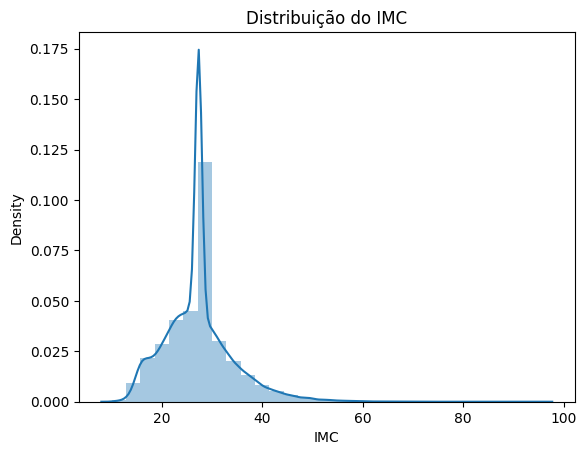

In [109]:
#Vamos plotar a distribuição do IMC
sns.distplot(df['IMC'],bins= 30)
plt.title("Distribuição do IMC")
plt.show()

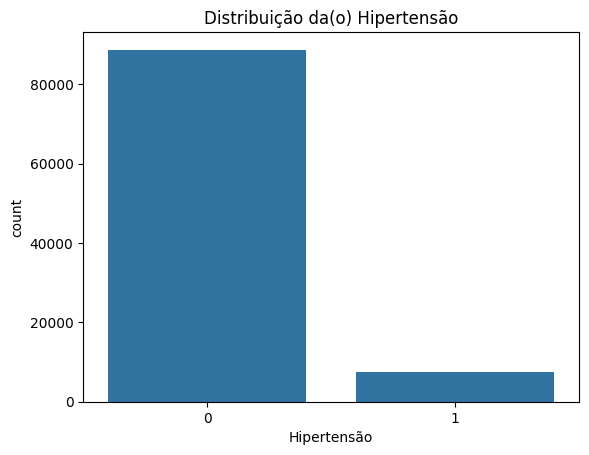

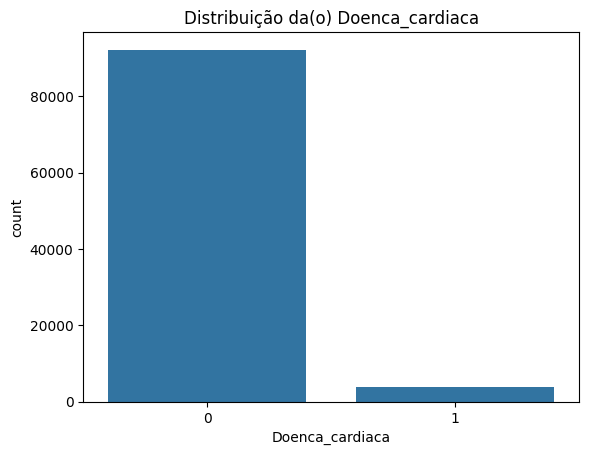

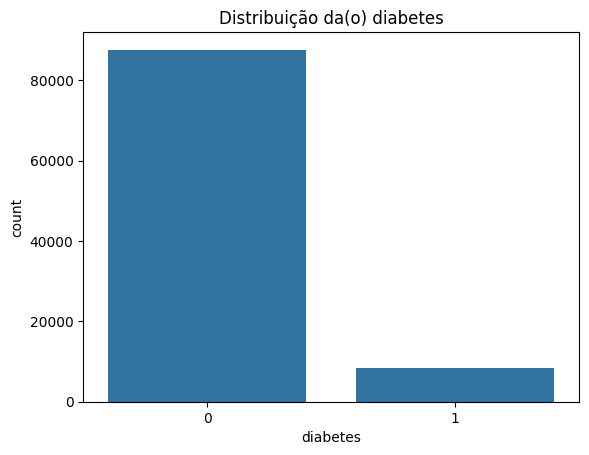

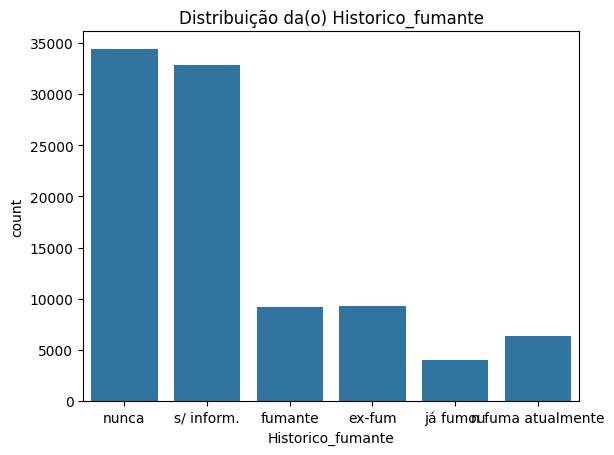

In [110]:
#Vamos ver as distribuições das variáveis 
for col in ['Hipertensão', 'Doenca_cardiaca', 'diabetes',"Historico_fumante"]:
    sns.countplot(x=col, data=df)
    plt.title(f'Distribuição da(o) {col}')
    plt.show()

In [113]:
#Vamos ter que agrupar os fumantes
def combinando_fumantes(estado):
    if estado in ["nunca","s/ inform."]:
        return 'não-fumante'
    elif estado == 'fumante':
        return "fumante"
    elif estado in ['ex-fum','já fumou', 'n fuma atualmente']:
        return "ex-fumante"
    
df['Historico_fumante'] = df["Historico_fumante"].apply(combinando_fumantes)

print(df["Historico_fumante"].value_counts())

Historico_fumante
não-fumante    67276
ex-fumante     19655
fumante         9197
Name: count, dtype: int64


In [115]:
data = df.copy()

data.head()

,Gênero,Idade,Hipertensão,Doenca_cardiaca,Historico_fumante,IMC,Nivel_HbA1c,nivel_glicose_sangue,diabetes
0,Feminino,80.0,0,1,não-fumante,25.19,6.6,140,0
1,Feminino,54.0,0,0,não-fumante,27.32,6.6,80,0
2,Masculino,28.0,0,0,não-fumante,27.32,5.7,158,0
3,Feminino,36.0,0,0,fumante,23.45,5.0,155,0
4,Masculino,76.0,1,1,fumante,20.14,4.8,155,0


In [117]:
le_genero = LabelEncoder()
le_fumante = LabelEncoder()

data['Gênero'] = le_genero.fit_transform(data['Gênero'])
data['Historico_fumante'] = le_fumante.fit_transform(data['Historico_fumante'])

In [138]:

# Features e target
X = data.drop('diabetes', axis=1)
y = data['diabetes']

# Dividir treino/teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Calcular scale_pos_weight
neg = sum(y_train == 0)
pos = sum(y_train == 1)
scale_pos_weight = neg / pos if pos != 0 else 1  # Evitar divisão por zero

# Criar e treinar modelo XGBoost com balanceamento
params = {
    'objective': 'binary:logistic',
    'learning_rate': 0.1,
    'max_depth': 2,
    'n_estimators': 350,
    'scale_pos_weight': 1,
    'use_label_encoder': False,
    'eval_metric': 'logloss',
    'random_state': 42
}

model = xgb.XGBClassifier(**params)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)


/home/lslima/.local/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [21:43:11] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [139]:
model.fit(X_train, y_train)

# Previsões
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:,1]

/home/lslima/.local/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [21:43:14] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [142]:

# Avaliar
print(classification_report(y_test, y_pred))
print("AUC ROC:", roc_auc_score(y_test, y_pred_proba))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     17525
           1       0.99      0.67      0.80      1701

    accuracy                           0.97     19226
   macro avg       0.98      0.83      0.89     19226
weighted avg       0.97      0.97      0.97     19226

AUC ROC: 0.9777491129242596


/home/lslima/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


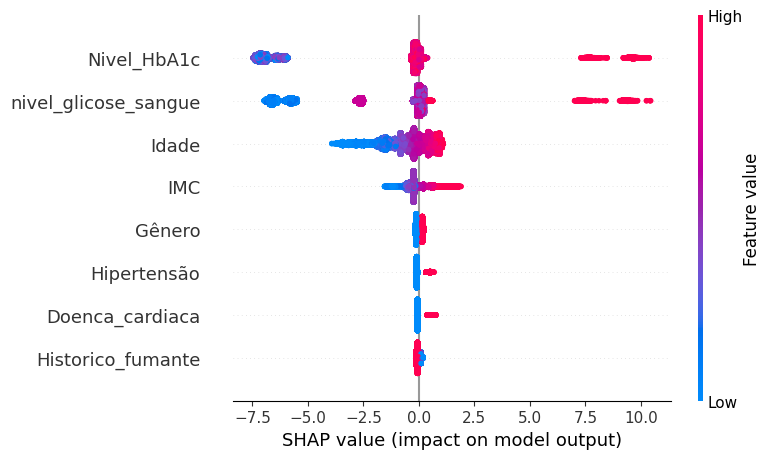

In [168]:
import shap

explainer = shap.Explainer(model)
shap_values = explainer(X)

shap.summary_plot(shap_values, X)


In [121]:

param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200],
    'scale_pos_weight': [1, 5, 10]
}

model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='f1', cv=3, verbose=1)

grid_search.fit(X_train, y_train)

print("Melhores parâmetros:", grid_search.best_params_)
print("Melhor F1:", grid_search.best_score_)

Fitting 3 folds for each of 54 candidates, totalling 162 fits


/home/lslima/.local/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [21:31:10] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/lslima/.local/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [21:31:10] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/lslima/.local/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [21:31:10] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/lslima/.local/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [21:31:11] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/lslima/.local/lib/python3.10/site-packages/xgboost/trainin

Melhores parâmetros: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100, 'scale_pos_weight': 1}
Melhor F1: 0.8088404283418057


/home/lslima/.local/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [21:31:50] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [157]:
model_rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=4,
    class_weight='balanced',  # para ajudar com desbalanceamento
    random_state=42
)

model_rf.fit(X_train, y_train)

y_pred = model_rf.predict(X_test)
y_pred_proba = model_rf.predict_proba(X_test)[:, 1]


In [162]:

print(classification_report(y_test, y_pred))
print("AUC ROC:", roc_auc_score(y_test, y_pred_proba))
print("Acurácia do modelo: ", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.92      0.95     17525
           1       0.51      0.87      0.64      1701

    accuracy                           0.91     19226
   macro avg       0.75      0.89      0.80     19226
weighted avg       0.94      0.91      0.92     19226

AUC ROC: 0.9681082622372843
Acurácia do modelo:  0.9137626131280557


In [163]:
# Supondo que você tenha um DataFrame X com os nomes das features
features = X.columns

# Pegando as importâncias
importances = model.feature_importances_

# Criando DataFrame para visualização
df_importance = pd.DataFrame({'feature': features, 'importance': importances})
df_importance = df_importance.sort_values(by='importance', ascending=False)

# Mostrar
print(df_importance)

                feature  importance
6           Nivel_HbA1c    0.526483
7  nivel_glicose_sangue    0.229668
1                 Idade    0.094433
2           Hipertensão    0.053378
3       Doenca_cardiaca    0.046136
5                   IMC    0.032244
0                Gênero    0.010914
4     Historico_fumante    0.006744
